In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/delhi-air-quality-dataset/final_dataset.csv
/kaggle/input/top-spotify-songs-in-countries/spotify_history.csv
/kaggle/input/top-spotify-songs-in-countries/spotify_data_dictionary Description.csv


In [2]:
delhiairqual=pd.read_csv("/kaggle/input/delhi-air-quality-dataset/final_dataset.csv")

In [3]:
delhiairqual.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [4]:
delhiairqual.dtypes

Date                int64
Month               int64
Year                int64
Holidays_Count      int64
Days                int64
PM2.5             float64
PM10              float64
NO2               float64
SO2               float64
CO                float64
Ozone             float64
AQI                 int64
dtype: object

In [5]:
delhiairqual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1461 non-null   int64  
 1   Month           1461 non-null   int64  
 2   Year            1461 non-null   int64  
 3   Holidays_Count  1461 non-null   int64  
 4   Days            1461 non-null   int64  
 5   PM2.5           1461 non-null   float64
 6   PM10            1461 non-null   float64
 7   NO2             1461 non-null   float64
 8   SO2             1461 non-null   float64
 9   CO              1461 non-null   float64
 10  Ozone           1461 non-null   float64
 11  AQI             1461 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 137.1 KB


In [6]:
delhiairqual.shape

(1461, 12)

In [7]:
delhiairqual.isnull().sum()

Date              0
Month             0
Year              0
Holidays_Count    0
Days              0
PM2.5             0
PM10              0
NO2               0
SO2               0
CO                0
Ozone             0
AQI               0
dtype: int64

In [8]:
delhiairqual.duplicated().sum()

0

In [9]:
delhiairqual.describe()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,15.729637,6.522930,2022.501027,0.189596,4.000684,90.774538,218.219261,37.184921,20.104921,1.025832,36.338871,202.210815
std,8.803105,3.449884,1.118723,0.392116,2.001883,71.650579,129.297734,35.225327,16.543659,0.608305,18.951204,107.801076
min,1.000000,1.000000,2021.000000,0.000000,1.000000,0.050000,9.690000,2.160000,1.210000,0.270000,2.700000,19.000000
25%,8.000000,4.000000,2022.000000,0.000000,2.000000,41.280000,115.110000,17.280000,7.710000,0.610000,24.100000,108.000000
50%,16.000000,7.000000,2023.000000,0.000000,4.000000,72.060000,199.800000,30.490000,15.430000,0.850000,32.470000,189.000000
75%,23.000000,10.000000,2024.000000,0.000000,6.000000,118.500000,297.750000,45.010000,26.620000,1.240000,45.730000,284.000000
max,31.000000,12.000000,2024.000000,1.000000,7.000000,1000.000000,1000.000000,433.980000,113.400000,4.700000,115.870000,500.000000


In [10]:
delhiairqual.columns

Index(['Date', 'Month', 'Year', 'Holidays_Count', 'Days', 'PM2.5', 'PM10',
       'NO2', 'SO2', 'CO', 'Ozone', 'AQI'],
      dtype='object')

In [ ]:
 for col in ['PM2.5','PM10','NO2','SO2','CO','Ozone']:
    plt.plot(delhiairqual["Date"],delhiairqual[col],label=col,alpha=0.7)
plt.title('Daily Trend of Pollutants in Delhi')
plt.xlabel('Date')
plt.ylabel('Pollutant Levels')
plt.legend()
plt.tight_layout()
plt.show()

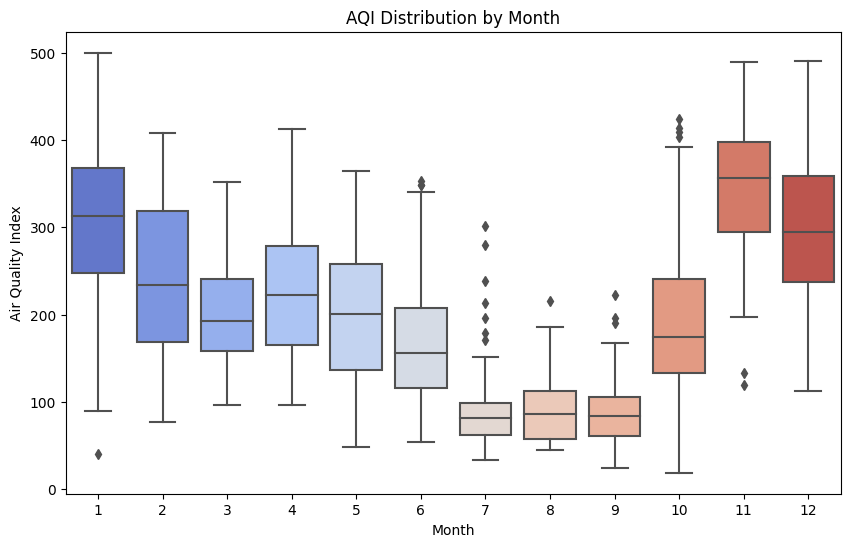

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=delhiairqual, x='Month', y='AQI', palette='coolwarm')
plt.title('AQI Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Air Quality Index')
plt.show()

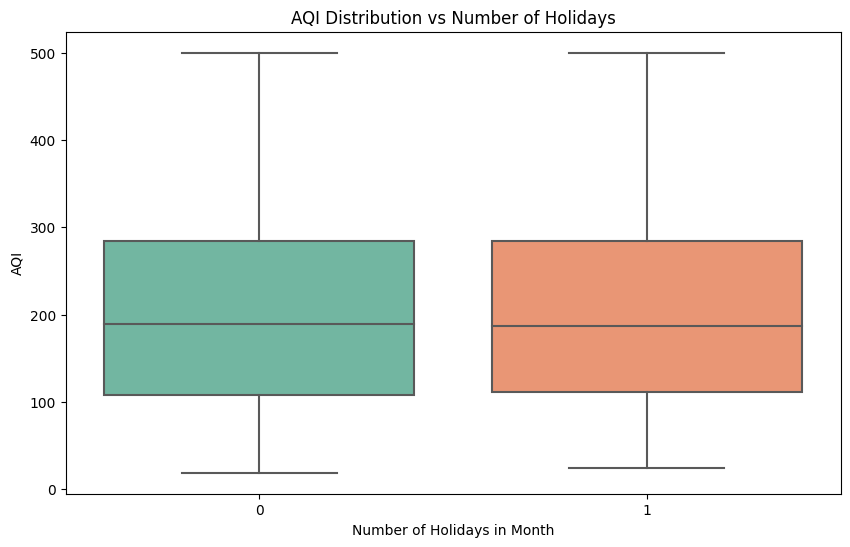

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Holidays_Count', y='AQI', data=delhiairqual, palette='Set2')
plt.title('AQI Distribution vs Number of Holidays')
plt.xlabel('Number of Holidays in Month')
plt.ylabel('AQI')
plt.show()

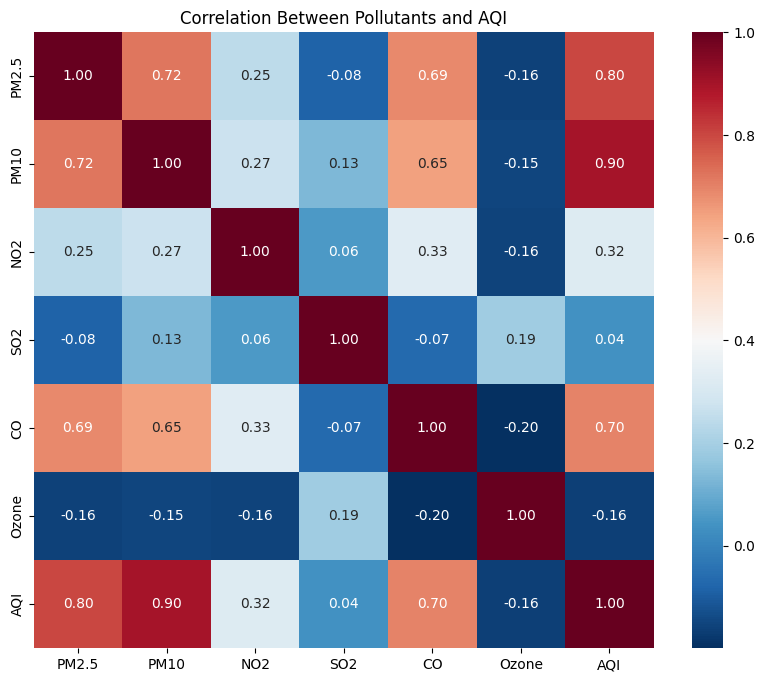

In [14]:
plt.figure(figsize=(10, 8))
correlation = delhiairqual[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']].corr()
sns.heatmap(correlation, annot=True, cmap='RdBu_r', fmt='.2f')
plt.title('Correlation Between Pollutants and AQI')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
X=delhiairqual.copy()
y=X.pop('AQI')
preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

input_shape = [X.shape[1]]

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

2025-08-12 09:48:20.940650: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754992101.160602      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754992101.223092      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-12 09:48:35.309645: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call 

In [19]:
model.compile(
    optimizer='adam',
    loss='mae'
)
model.fit(
    X_train,y_train,
    batch_size=128,
    epochs=200
)
history=model.fit(
    X_train,y_train,
    batch_size=128,
    epochs=200
)


Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2344
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1296 
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0809 
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0756 
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0651 
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0589 
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0666 
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0578 
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0590 
Epoch 10/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0638 
Epoch 11/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0558 
Epoch 12/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0590 
Epoch 13/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0637 
Epoch 14/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0647 
Epoch 15/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss

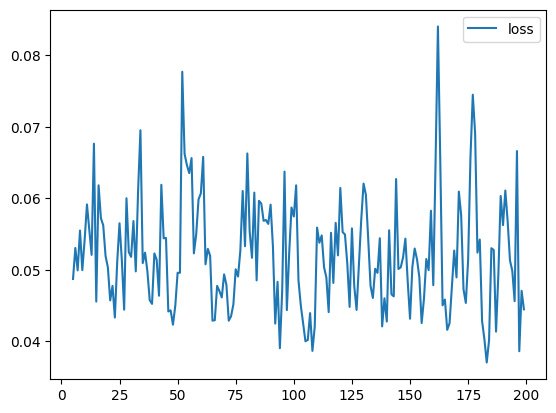

In [20]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();

In [21]:
pred=model.predict(X)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


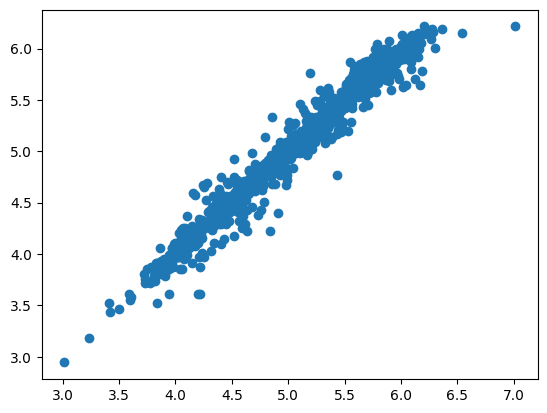

In [22]:
plt.scatter(pred,y)

In [23]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(pred, y)

0.06921071872265547

In [ ]:
from sklearn.metrics import r2_score
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred) * 100

In [ ]:
score